
# <p style="padding:10px;background-color:#0f4c8c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">"E-Commerce Gender Prediction and Personalization Enhancement Using Hyperparameter-Tuned Random Forest and LightGBM"</p>

 

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Problem Statement</p>

#### In this project, we employ machine learning classification models, such as Random Forest and AdaBoost, to predict customer gender, addressing the following challenges:

  - It has been observed that almost 42% of Customer Genders are missing from the database of a e-commerce platform. 
  - It is badly impacting their Gender-based personalization campaigns, i.e., a Male customer is getting a female t-shirt’s recommendation as the Gender of that Customer is “Unknown” in the database.
  - As per the Business head, this is leading to a decrease in the overall Click through Rate of most fashion-related categories. 


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [210]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Loading the dataset</p>

In [111]:
data1= pd.read_csv('Fidlatica/Data_1.csv')
data2= pd.read_csv('Fidlatica/Data_2.csv')
data = pd.merge(data2, data1, how='inner')

In [112]:
data.head()

,Customer ID,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
0,C1,MALE,Aaban,3,0,Web,Cherokee,Lifestyle,CASH,Deborah Milano
1,C2,MALE,Aabid,10,8,Web,Ascot,Lifestyle,CARD,Nanz Comfort
2,C3,FEMALE,Aadam,12,9,Mobile,Ascot,Lifestyle,CARD,Mia by Tanishq
3,C4,FEMALE,Aadan,3,3,Mobile,Westside Home,Lifestyle,NB,Titan
4,C5,MALE,Aadarsh,1,1,Web,AMZER,Electronics,CASH,0


In [113]:
data['customer_gender'].value_counts()

(null)    723
MALE      710
FEMALE    300
Name: customer_gender, dtype: int64

In [114]:
data.shape

(1733, 10)


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Dropping Unnecessary colomn</p>

In [115]:
data.drop(['Customer ID'], axis = 1, inplace= True)
data.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
0,MALE,Aaban,3,0,Web,Cherokee,Lifestyle,CASH,Deborah Milano
1,MALE,Aabid,10,8,Web,Ascot,Lifestyle,CARD,Nanz Comfort
2,FEMALE,Aadam,12,9,Mobile,Ascot,Lifestyle,CARD,Mia by Tanishq
3,FEMALE,Aadan,3,3,Mobile,Westside Home,Lifestyle,NB,Titan
4,MALE,Aadarsh,1,1,Web,AMZER,Electronics,CASH,0



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Encoding Categorical Varibales before the train-test split</p>

In [116]:
data.isna().sum()

customer_gender     0
Name                0
order_id            0
DELIVERD            0
p_platform          0
p_brand             0
p_category         82
p_pay_type          0
brand_name          0
dtype: int64

In [117]:
#Label encoding categorical variables except for p_category as it has to be dealth seperately
data["p_brand"] = le.fit_transform(data["p_brand"])
data["brand_name"] = le.fit_transform(data["brand_name"])
data["Name "] = le.fit_transform(data["Name "])
#data["p_platform"]=le.fit_transform(data["p_platform"])
#data["p_category"]=le.fit_transform(data["p_category"])  
#data["p_pay_type"]=le.fit_transform(data["p_pay_type"]) 

In [118]:
data.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
0,MALE,1,3,0,Web,76,Lifestyle,CASH,47
1,MALE,2,10,8,Web,29,Lifestyle,CARD,116
2,FEMALE,3,12,9,Mobile,29,Lifestyle,CARD,110
3,FEMALE,4,3,3,Mobile,419,Lifestyle,NB,175
4,MALE,5,1,1,Web,6,Electronics,CASH,0



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Test Set with missing Gender values</p>

In [119]:
predict_data= data[data.customer_gender == '(null)']

In [120]:
predict_data.shape

(723, 9)


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Train set and Validation set</p>

In [121]:
#The remainng will be our train set and validation set
data=data[data.customer_gender != '(null)']
data.shape

(1010, 9)

In [122]:
#data.to_excel(r'C:\Users\cyril\Downloads\data_merged.xlsx', index=False)


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Data Preprocessing</p>

# 
<font color='darkblue' size =6><b>Dealing with missing values </b></font> <br> 

In [123]:
data.isna().sum()

customer_gender     0
Name                0
order_id            0
DELIVERD            0
p_platform          0
p_brand             0
p_category         52
p_pay_type          0
brand_name          0
dtype: int64

In [124]:
predict_data.isna().sum()

customer_gender     0
Name                0
order_id            0
DELIVERD            0
p_platform          0
p_brand             0
p_category         30
p_pay_type          0
brand_name          0
dtype: int64

In [125]:
data.shape

(1010, 9)

In [126]:
#Checking value counts in product category colomn
data['p_category'].value_counts()

Lifestyle      535
Electronics    388
Luxury          34
0                1
Name: p_category, dtype: int64

In [127]:
data.dtypes

customer_gender    object
Name                int32
order_id            int64
DELIVERD            int64
p_platform         object
p_brand             int32
p_category         object
p_pay_type         object
brand_name          int32
dtype: object

In [128]:
data['customer_gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [129]:
data['customer_gender'].value_counts()

MALE      710
FEMALE    300
Name: customer_gender, dtype: int64


<font color='darkblue' size =6><b>Data Imputation for missing values
 </b></font> <br> 

In [130]:
data['p_category'].unique()

array(['Lifestyle', 'Electronics', 'Luxury', nan, '0'], dtype=object)

In [131]:
data['p_category'].value_counts()

Lifestyle      535
Electronics    388
Luxury          34
0                1
Name: p_category, dtype: int64

In [132]:
# Replacing na values in Product Category  with a category called "Missing"
data["p_category"].fillna("Missing", inplace = True)

In [133]:
data['p_category'].value_counts()

Lifestyle      535
Electronics    388
Missing         52
Luxury          34
0                1
Name: p_category, dtype: int64

In [134]:
data.isna().sum()

customer_gender    0
Name               0
order_id           0
DELIVERD           0
p_platform         0
p_brand            0
p_category         0
p_pay_type         0
brand_name         0
dtype: int64

In [135]:
data['p_category'].unique()

array(['Lifestyle', 'Electronics', 'Luxury', 'Missing', '0'], dtype=object)

In [136]:
data['p_category'].value_counts()

Lifestyle      535
Electronics    388
Missing         52
Luxury          34
0                1
Name: p_category, dtype: int64

In [137]:
#Creating a checkpoint
df=data.copy(deep=True)

In [138]:
df['p_platform'].unique()

array(['Web', 'Mobile', '0'], dtype=object)

In [139]:
df['p_platform'].value_counts()

Mobile    643
Web       366
0           1
Name: p_platform, dtype: int64

In [140]:
#Removing the record with large perctage of missing values
df = df[data.p_platform != 0]

In [141]:
df.shape

(1010, 9)

In [142]:
pd.set_option('display.max_rows', 500)

In [143]:
df['p_brand'].value_counts()

397    40
440    39
430    35
307    34
296    24
315    21
338    18
50     18
26     16
198    15
153    14
427    13
149    12
446    12
206    12
381    11
336    11
160     9
123     9
92      8
140     8
441     8
76      8
23      8
377     7
58      7
316     7
356     7
353     7
93      6
435     6
335     6
419     6
361     6
413     6
409     6
213     6
420     5
162     5
447     5
289     5
411     5
177     5
439     5
82      5
114     5
121     5
392     5
268     5
293     4
185     4
25      4
98      4
43      4
295     4
414     4
301     4
215     4
412     4
264     4
237     4
287     4
383     4
231     3
269     3
41      3
444     3
102     3
184     3
227     3
417     3
79      3
364     3
342     3
131     3
56      3
309     3
151     3
279     3
74      3
73      3
403     3
415     3
346     3
30      3
111     3
20      3
116     3
27      3
81      3
89      3
28      3
280     2
421     2
308     2
194     2
83      2
288     2
21      2
29      2


In [144]:
df['Name '].unique()

array([  1,   2,   3, ..., 789, 790,  40])

In [145]:
#Lee already deletd in previous step(one with large missing values)
df.loc[df['Name '] == 'Lee']

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name


In [146]:
df['p_category'].value_counts()

Lifestyle      535
Electronics    388
Missing         52
Luxury          34
0                1
Name: p_category, dtype: int64

In [147]:
df['p_pay_type'].value_counts()

CARD        538
CASH        207
0           162
NB           72
CliqCash     27
WALLET        4
Name: p_pay_type, dtype: int64

In [148]:
df['brand_name'].value_counts()

#Delete brand_name and consider p_pay_type 0 as missing

0      752
136     15
25      12
209     10
196      7
23       5
187      4
70       4
11       4
132      4
92       4
159      4
32       4
142      4
175      3
198      3
184      3
180      3
96       3
130      3
21       3
37       3
183      3
143      3
82       2
40       2
191      2
18       2
80       2
190      2
76       2
185      2
201      2
206      2
33       2
189      2
94       2
71       2
105      2
7        2
38       2
79       2
139      2
84       2
151      2
30       2
55       1
36       1
90       1
197      1
1        1
200      1
123      1
5        1
58       1
192      1
207      1
78       1
112      1
14       1
186      1
133      1
47       1
128      1
108      1
99       1
195      1
118      1
194      1
72       1
83       1
170      1
137      1
129      1
153      1
127      1
69       1
131      1
65       1
15       1
188      1
60       1
169      1
122      1
144      1
120      1
81       1
160      1
16       1
95       1
26       1

In [149]:
#df.drop(['Customer ID'], axis = 1, inplace= True)


In [153]:
df.head(5)

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
0,MALE,1,3,0,Web,76,Lifestyle,CASH,47
1,MALE,2,10,8,Web,29,Lifestyle,CARD,116
2,FEMALE,3,12,9,Mobile,29,Lifestyle,CARD,110
3,FEMALE,4,3,3,Mobile,419,Lifestyle,NB,175
4,MALE,5,1,1,Web,6,Electronics,CASH,0



<font color='darkblue' size =6><b>Encoding Remaining categorical variables </b></font> <br> 

In [154]:
df["p_platform"] = le.fit_transform(df["p_platform"])
df["p_category"] = le.fit_transform(df["p_category"])
df["p_pay_type"] = le.fit_transform(df["p_pay_type"])
df["p_pay_type"] = le.fit_transform(df["p_pay_type"])
df["customer_gender"] = le.fit_transform(df["customer_gender"])
df.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
0,1,1,3,0,2,76,2,2,47
1,1,2,10,8,2,29,2,1,116
2,0,3,12,9,1,29,2,1,110
3,0,4,3,3,1,419,2,4,175
4,1,5,1,1,2,6,1,2,0



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Feature Selection</p>

In [155]:
df_feature_imp=df.copy(deep=True)

In [ ]:
#df_feature_imp["customer_gender"] = le.fit_transform(df_feature_imp["customer_gender"])
#df_feature_imp["p_brand"] = le.fit_transform(df_feature_imp["p_brand"])
#df_feature_imp["brand_name"] = le.fit_transform(df_feature_imp["brand_name"])

In [156]:
df_feature_imp.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
0,1,1,3,0,2,76,2,2,47
1,1,2,10,8,2,29,2,1,116
2,0,3,12,9,1,29,2,1,110
3,0,4,3,3,1,419,2,4,175
4,1,5,1,1,2,6,1,2,0


In [157]:
#Dividing data into Input X variables and Target Y variable
X = df_feature_imp.drop(["customer_gender"],axis=1)
y = df_feature_imp["customer_gender"]

Feature importance by Random Forest:->

Name  -> 0.3866187442190399
order_id -> 0.08284124428651568
DELIVERD -> 0.07489030953579613
p_platform -> 0.029924760289405477
p_brand -> 0.23581106184741052
p_category -> 0.04685149470147837
p_pay_type -> 0.06758544612037445
brand_name -> 0.07547693899997952


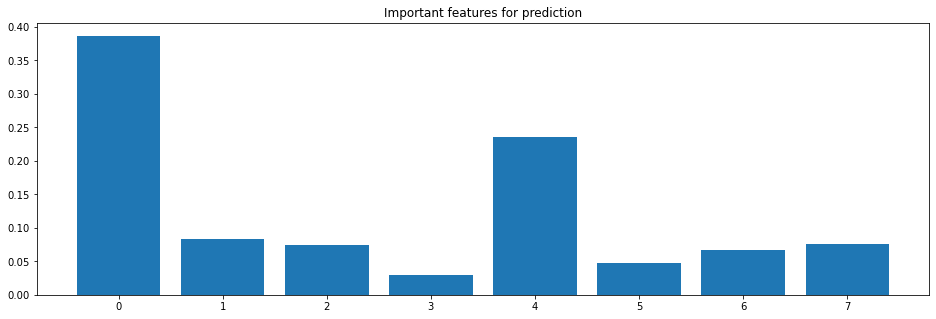

Feature importance by Decision Tree:->

Name  -> 0.4842504893397032
order_id -> 0.06308417896781394
DELIVERD -> 0.04585700268226964
p_platform -> 0.021246563686704537
p_brand -> 0.23855931110231574
p_category -> 0.03667603642188056
p_pay_type -> 0.05583551835844093
brand_name -> 0.05449089944087144


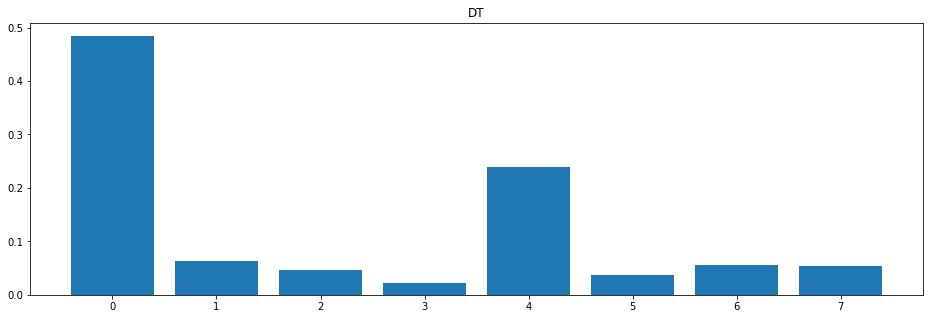

Feature importance by Logistic Regression:->

Name  -> -0.0004416268718009941
order_id -> -0.011150025608258628
DELIVERD -> 0.04322600668250177
p_platform -> 0.4497993453700655
p_brand -> -0.00020040135834747423
p_category -> -0.0024505791797045425
p_pay_type -> 0.038723439221517594
brand_name -> 0.000906917230330569


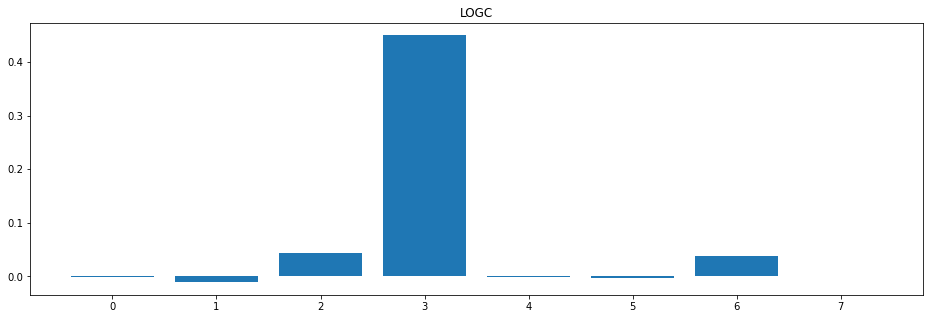

In [158]:
#Doing feature Importance


print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="Important features for prediction")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()



print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

**Using all variables as predictors to predict the Gender Target Variable**


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Data Split : Train Set and Validation Set</p>

In [159]:
df_feature_imp.shape

(1010, 9)

In [160]:
df_feature_imp.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
0,1,1,3,0,2,76,2,2,47
1,1,2,10,8,2,29,2,1,116
2,0,3,12,9,1,29,2,1,110
3,0,4,3,3,1,419,2,4,175
4,1,5,1,1,2,6,1,2,0


In [161]:
#Train split ratio of 80-20 percent
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train1, df_test1 = train_test_split(df_feature_imp, train_size = 0.8, test_size = 0.2, random_state = 100)



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Data Balancing : Hybrid Sampling Using Random Undersampling and SMOTE</p>

In [162]:
df_train1.shape

(808, 9)

In [163]:
df_test1.shape

(202, 9)

In [ ]:
##df_sdsbtrain1.shape

In [164]:
df_train1.customer_gender.value_counts()

1    568
0    240
Name: customer_gender, dtype: int64

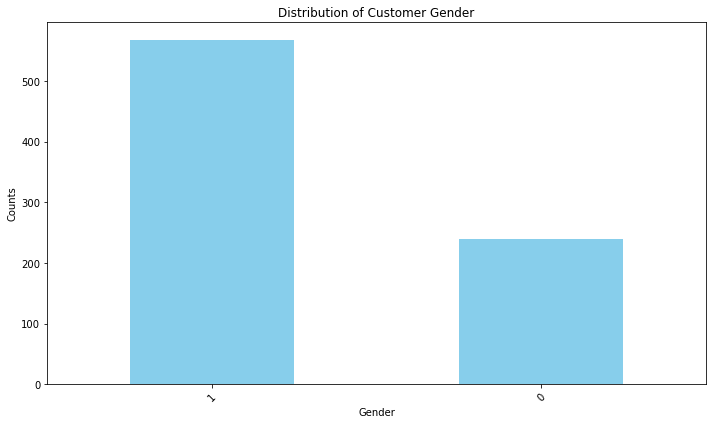

In [168]:
gender_counts = df_train1['customer_gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [169]:
#Divide Predictor Varibles(X) and Target Varible(y)

X = df_train1.loc[:,df_train1.columns!='customer_gender' ]
y = df_train1.loc[:,'customer_gender']


<font color='darkblue' size =6><b>Random Undersampling </b></font> <br> 

In [170]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = (242/490))

In [171]:
X, y = rus.fit_resample(X, y)

In [172]:
y.value_counts()

1    485
0    240
Name: customer_gender, dtype: int64

<font color='darkblue' size =6><b>SMOTE: Oversampling </b></font> <br> 

In [173]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(sampling_strategy=0.8,k_neighbors=5,random_state = 100) 
X, y = sm.fit_resample(X, y)

In [178]:
y.value_counts()

1    485
0    388
Name: customer_gender, dtype: int64

In [179]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: customer_gender, dtype: int32

In [181]:
# Append and Prepare the final Dataset
X['customer_gender'] = y

In [182]:
X.shape

(873, 9)

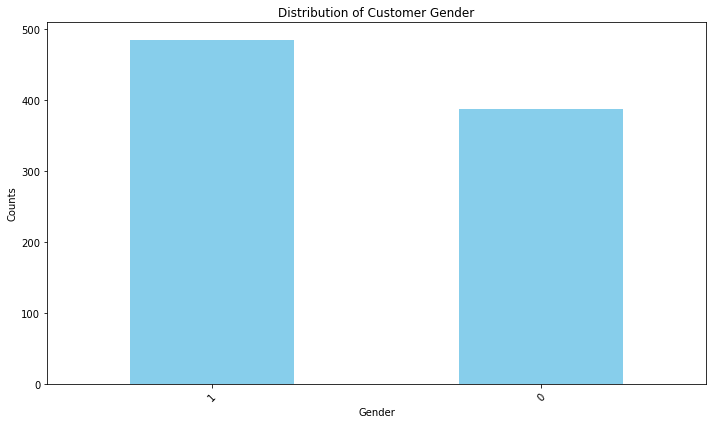

In [183]:
gender_count_sampled = X['customer_gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
gender_count_sampled.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [184]:
df_train1=X.copy(deep=True)
df_train1.shape

(873, 9)


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Model Building and Validation</p>

In [185]:
y_train1 = df_train1.pop('customer_gender')
X_train1 = df_train1


### <p style="padding:10px;background-color:#0f1c47;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">1. Logistic Regression</p>

In [186]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
yprediction=logreg.predict(X_train1)

In [187]:
#Train Set
from sklearn.metrics import accuracy_score

print("Accuracy=", accuracy_score( y_train1,yprediction))

Accuracy= 0.5738831615120275


In [188]:
y_test1 = df_test1.pop('customer_gender')
X_test1 = df_test1

In [189]:
#Test Set
yprediction=logreg.predict(X_test1)
print("Accuracy=", accuracy_score( y_test1,yprediction))

print(classification_report(y_test1, yprediction))
#print(confusion_matrix(y_test, yprediction))


Accuracy= 0.6633663366336634
              precision    recall  f1-score   support

           0       0.43      0.40      0.41        60
           1       0.75      0.77      0.76       142

    accuracy                           0.66       202
   macro avg       0.59      0.59      0.59       202
weighted avg       0.66      0.66      0.66       202




### <p style="padding:10px;background-color:#0f1c47;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">2. KNN </p>

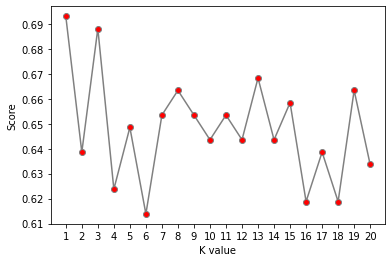

KNN best accuracy: 69.31%
              precision    recall  f1-score   support

           0       0.43      0.40      0.41        60
           1       0.75      0.77      0.76       142

    accuracy                           0.66       202
   macro avg       0.59      0.59      0.59       202
weighted avg       0.66      0.66      0.66       202



In [190]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train1, y_train1)
    scoreListknn.append(KNclassifier.score(X_test1, y_test1))
    
plt.plot(range(1,21), scoreListknn,color='grey', marker='o', markerfacecolor='red')
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

print(classification_report(y_test1, yprediction))
#print(confusion_matrix(y_test1, yprediction)

In [195]:
#Model tuned with best K value
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors = 3)
knnc.fit(X_train1, y_train1)
yprediction=knnc.predict(X_test1)
print("Accuracy=",accuracy_score(y_test1,yprediction))

print("-- KNN Classifier - testdata --")
print("Accuracy=",accuracy_score( y_test1,yprediction))
print(classification_report(y_test1, yprediction))

Accuracy= 0.6881188118811881
-- KNN Classifier - testdata --
Accuracy= 0.6881188118811881
              precision    recall  f1-score   support

           0       0.48      0.55      0.51        60
           1       0.80      0.75      0.77       142

    accuracy                           0.69       202
   macro avg       0.64      0.65      0.64       202
weighted avg       0.70      0.69      0.69       202




### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Ensembling Methods: Bagging and Boosting</p>


### <p style="padding:10px;background-color:#0f1c47;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">3. Random Forest</p>

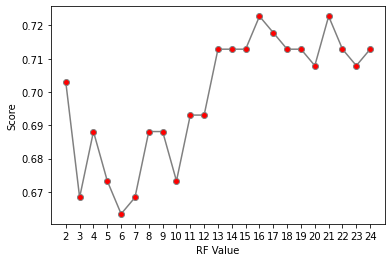

Random Forest Accuracy:  72.28%


In [196]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 50, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train1, y_train1)
    scoreListRF.append(RFclassifier.score(X_test1, y_test1))
    
plt.plot(range(2,25), scoreListRF, color='grey',marker='o', markerfacecolor='red')
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

#print(classification_report(y_test1, yprediction))
#print(confusion_matrix(y_test1, yprediction)

In [197]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,criterion='gini',max_leaf_nodes=4,random_state = 1)
rfc.fit(X_train1, y_train1)
yprediction=rfc.predict(X_test1)
print("Test data Accuracy=",accuracy_score(  y_test1,yprediction))

yprediction_train=rfc.predict(X_train1)
print("Train data Accuracy=",accuracy_score(  y_train1,yprediction_train))

print("-- Random Forest - testdata --")
print("Accuracy=",accuracy_score(  y_test1,yprediction))
print(classification_report(y_test1, yprediction))

Test data Accuracy= 0.6881188118811881
Train data Accuracy= 0.6701030927835051
-- Random Forest - testdata --
Accuracy= 0.6881188118811881
              precision    recall  f1-score   support

           0       0.47      0.33      0.39        60
           1       0.75      0.84      0.79       142

    accuracy                           0.69       202
   macro avg       0.61      0.59      0.59       202
weighted avg       0.66      0.69      0.67       202




### <p style="padding:10px;background-color:#0f1c47;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">3. Random Forest : Hyperparamter Tuned using GridsearchCV</p>

In [200]:
# Grid search random forest

from sklearn.model_selection import GridSearchCV


grid_param = {  
    'n_estimators': [50, 80, 100, 120],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [10,30,50],
    'max_features': ['auto', 'sqrt','log2'],
    'min_samples_split': [3,9,20],
    'min_samples_leaf': [1, 2, 4]
    }

gs = GridSearchCV(estimator=rfc,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gs.fit(X_train1, y_train1) 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_leaf_nodes=4, n_estimators=50,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [3, 9, 20],
                         'n_estimators': [50, 80, 100, 120]},
             scoring='accuracy')

In [204]:
print(gs.best_params_)


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 80}


In [209]:
# Training the tuned algorithm

forest_tuned = RandomForestClassifier(n_estimators=50,
                                      criterion= 'gini',
                                      bootstrap= False,
                                      max_depth= 10,
                                      max_leaf_nodes=4,
                                      max_features= 'auto',
                                      min_samples_split= 3,
                                      min_samples_leaf= 4,
                                      random_state=1)
forest_tuned.fit(X_train1, y_train1)
y_pred = forest_tuned.predict(X_test1)
print("Test data Accuracy=",accuracy_score(  y_test1,y_pred))
print("-- Random Forest tuned - testdata --")
print("Accuracy=",accuracy_score(  y_test1,y_pred))
print(classification_report(y_test1, y_pred))

Test data Accuracy= 0.6881188118811881
-- Random Forest tuned - testdata --
Accuracy= 0.6881188118811881
              precision    recall  f1-score   support

           0       0.47      0.40      0.43        60
           1       0.76      0.81      0.78       142

    accuracy                           0.69       202
   macro avg       0.62      0.60      0.61       202
weighted avg       0.68      0.69      0.68       202




### <p style="padding:10px;background-color:#0f1c47;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">4. Adaboost</p>

In [211]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=1)
ada.fit(X_train1, y_train1)
y_pred_ada = ada.predict(X_test1)

print("AdaBoost Test Data Accuracy=", accuracy_score(y_test1, y_pred_ada))
print("AdaBoost Train Data Accuracy=", accuracy_score(y_train1, ada.predict(X_train1)))
print("-- AdaBoost - Test Data --")
print(classification_report(y_test1, y_pred_ada))

AdaBoost Test Data Accuracy= 0.7079207920792079
AdaBoost Train Data Accuracy= 0.7342497136311569
-- AdaBoost - Test Data --
              precision    recall  f1-score   support

           0       0.51      0.63      0.56        60
           1       0.83      0.74      0.78       142

    accuracy                           0.71       202
   macro avg       0.67      0.69      0.67       202
weighted avg       0.73      0.71      0.72       202




### <p style="padding:10px;background-color:#0f1c47;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">5. XGBoost</p>

In [212]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, random_state=1)
xgb.fit(X_train1, y_train1)
y_pred_xgb = xgb.predict(X_test1)

print("XGBoost Test Data Accuracy=", accuracy_score(y_test1, y_pred_xgb))
print("XGBoost Train Data Accuracy=", accuracy_score(y_train1, xgb.predict(X_train1)))
print("-- XGBoost - Test Data --")
print(classification_report(y_test1, y_pred_xgb))

XGBoost Test Data Accuracy= 0.6831683168316832
XGBoost Train Data Accuracy= 0.993127147766323
-- XGBoost - Test Data --
              precision    recall  f1-score   support

           0       0.47      0.45      0.46        60
           1       0.77      0.78      0.78       142

    accuracy                           0.68       202
   macro avg       0.62      0.62      0.62       202
weighted avg       0.68      0.68      0.68       202




### <p style="padding:10px;background-color:#0f1c47;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">6. LightGBM</p>

In [216]:
# LightGBM
lgbm = LGBMClassifier(n_estimators=50, max_depth=4, random_state=1)
lgbm.fit(X_train1, y_train1)
y_pred_lgbm = lgbm.predict(X_test1)

print("LightGBM Test Data Accuracy=", accuracy_score(y_test1, y_pred_lgbm))
print("LightGBM Train Data Accuracy=", accuracy_score(y_train1, lgbm.predict(X_train1)))
print("-- LightGBM - Test Data --")
print(classification_report(y_test1, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 485, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555556 -> initscore=0.223144
[LightGBM] [Info] Start training from score 0.223144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be


### <p style="padding:10px;background-color:#0f1c47;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">6. LightGBM : Hyperparamter Tuned</p>

In [214]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define your LightGBM model
lgbm = LGBMClassifier(random_state=1)

# Define a grid of hyperparameters to test
grid_param_lgbm = {  
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [31, 50, 100],
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'max_depth': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
gs_lgbm = GridSearchCV(estimator=lgbm,  
                       param_grid=grid_param_lgbm,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

# Perform the search
gs_lgbm.fit(X_train1, y_train1)

# Print the best parameters found
print(gs_lgbm.best_params_)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 485, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555556 -> initscore=0.223144
[LightGBM] [Info] Start training from score 0.223144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [217]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the LightGBM model with your tuned hyperparameters
lgbm_tuned = LGBMClassifier(n_estimators=50,
                            boosting_type='gbdt',
                            colsample_bytree=1.0,
                            learning_rate=0.1,
                            max_depth=4,
                            num_leaves=31,
                            subsample=0.6,
                            random_state=1)

# Fit the model to your training data
lgbm_tuned.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_lgbm = lgbm_tuned.predict(X_test1)

# Print the accuracy on the test data
print("Test data Accuracy=", accuracy_score(y_test1, y_pred_lgbm))

# Print out the classification report for more detailed metrics
print("-- LightGBM tuned - testdata --")
print("Accuracy=", accuracy_score(y_test1, y_pred_lgbm))
print(classification_report(y_test1, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 485, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555556 -> initscore=0.223144
[LightGBM] [Info] Start training from score 0.223144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500"> Prediction on Test test</p>

In [218]:
predict_data.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
30,(null),819,1,1,Mobile,235,Electronics,CARD,0
31,(null),820,4,3,Mobile,107,Lifestyle,CASH,4
32,(null),821,3,2,Mobile,437,Luxury,CARD,0
33,(null),822,3,3,Web,190,Electronics,CARD,147
34,(null),823,1,0,Mobile,417,Lifestyle,CARD,0



<font color='darkblue' size =6><b>Test Set PreProcessing to match with Train Set </b></font> <br> 

In [219]:
predict_data.drop(['customer_gender'], axis = 1, inplace= True)
predict_data.head()

,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
30,819,1,1,Mobile,235,Electronics,CARD,0
31,820,4,3,Mobile,107,Lifestyle,CASH,4
32,821,3,2,Mobile,437,Luxury,CARD,0
33,822,3,3,Web,190,Electronics,CARD,147
34,823,1,0,Mobile,417,Lifestyle,CARD,0


In [220]:
predict_data.isna().sum()

Name           0
order_id       0
DELIVERD       0
p_platform     0
p_brand        0
p_category    30
p_pay_type     0
brand_name     0
dtype: int64

In [221]:
# replacing missing values
predict_data["p_category"].fillna("Missing", inplace = True)

In [222]:
#Label Encoding
predict_data["p_platform"] = le.fit_transform(predict_data["p_platform"])
predict_data["p_category"] = le.fit_transform(predict_data["p_category"])
predict_data["p_pay_type"] = le.fit_transform(predict_data["p_pay_type"])


In [223]:
predict_data.head()

,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
30,819,1,1,0,235,0,1,0
31,820,4,3,0,107,1,2,4
32,821,3,2,0,437,2,1,0
33,822,3,3,1,190,0,1,147
34,823,1,0,0,417,1,1,0




### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500"> Predicting Missing Gender Using Hyper tuned Random Forest</p>

In [224]:
yprediction_RF=forest_tuned.predict(predict_data)

In [225]:
yprediction_RF

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [232]:
# Append and Prepare the final Dataset
predict_data['Gender Predicted'] = yprediction_RF

In [233]:
predict_data.head(10)

,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name,Gender Predicted
30,819,1,1,0,235,0,1,0,0
31,820,4,3,0,107,1,2,4,1
32,821,3,2,0,437,2,1,0,1
33,822,3,3,1,190,0,1,147,1
34,823,1,0,0,417,1,1,0,0
35,824,1,1,0,231,0,1,212,0
37,826,1,1,0,296,1,2,23,0
38,827,2,1,0,26,0,1,0,1
39,828,1,1,1,6,0,2,0,1
40,829,1,1,1,140,1,2,0,0


In [234]:
predict_data['Gender Predicted'] = predict_data['Gender Predicted'].apply(lambda x: 'Female' if x==0 else 'Male')

In [235]:
predict_data.head(10)

,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name,Gender Predicted
30,819,1,1,0,235,0,1,0,Female
31,820,4,3,0,107,1,2,4,Male
32,821,3,2,0,437,2,1,0,Male
33,822,3,3,1,190,0,1,147,Male
34,823,1,0,0,417,1,1,0,Female
35,824,1,1,0,231,0,1,212,Female
37,826,1,1,0,296,1,2,23,Female
38,827,2,1,0,26,0,1,0,Male
39,828,1,1,1,6,0,2,0,Male
40,829,1,1,1,140,1,2,0,Female


In [236]:
predict_data['Gender Predicted'].value_counts()

Male      458
Female    265
Name: Gender Predicted, dtype: int64



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500"> Predicting Missing Gender Using Hyper tuned Light GBM</p>

In [252]:
data11= pd.read_csv('Fidlatica/Data_1.csv')
data22= pd.read_csv('Fidlatica/Data_2.csv')
data_Lgbm = pd.merge(data2, data1, how='inner')
#data_Lgbm_bckp= data_Lgbm.copy(deep=True)


<font color='darkblue' size =6><b>Test Set PreProcessing to match with Train Set </b></font> <br> 

In [253]:
#Drop ID
data_Lgbm.drop(['Customer ID'], axis = 1, inplace= True)

#Label encoding categorical variables except for p_category as it has to be dealth seperately
data_Lgbm["p_brand"] = le.fit_transform(data_Lgbm["p_brand"])
data_Lgbm["brand_name"] = le.fit_transform(data_Lgbm["brand_name"])
data_Lgbm["Name "] = le.fit_transform(data_Lgbm["Name "])

In [254]:
predict_data_lgbm= data_Lgbm[data_Lgbm.customer_gender == '(null)']
#Creating a backup to diplay final prediction
predict_data_lgbm_bckp= predict_data_lgbm.copy(deep=True)

In [255]:
predict_data_lgbm.shape

(723, 9)

In [256]:
predict_data_lgbm.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
30,(null),819,1,1,Mobile,235,Electronics,CARD,0
31,(null),820,4,3,Mobile,107,Lifestyle,CASH,4
32,(null),821,3,2,Mobile,437,Luxury,CARD,0
33,(null),822,3,3,Web,190,Electronics,CARD,147
34,(null),823,1,0,Mobile,417,Lifestyle,CARD,0


In [257]:
predict_data_lgbm.drop(['customer_gender'], axis = 1, inplace= True)
predict_data_lgbm.head()

,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
30,819,1,1,Mobile,235,Electronics,CARD,0
31,820,4,3,Mobile,107,Lifestyle,CASH,4
32,821,3,2,Mobile,437,Luxury,CARD,0
33,822,3,3,Web,190,Electronics,CARD,147
34,823,1,0,Mobile,417,Lifestyle,CARD,0


In [258]:
# replacing missing values
predict_data_lgbm["p_category"].fillna("Missing", inplace = True)

In [259]:
#Label Encoding
predict_data_lgbm["p_platform"] = le.fit_transform(predict_data_lgbm["p_platform"])
predict_data_lgbm["p_category"] = le.fit_transform(predict_data_lgbm["p_category"])
predict_data_lgbm["p_pay_type"] = le.fit_transform(predict_data_lgbm["p_pay_type"])
predict_data_lgbm.head()

,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name
30,819,1,1,0,235,0,1,0
31,820,4,3,0,107,1,2,4
32,821,3,2,0,437,2,1,0
33,822,3,3,1,190,0,1,147
34,823,1,0,0,417,1,1,0


In [260]:
yprediction_LGBM=lgbm.predict(predict_data_lgbm)

In [261]:
# Append and Prepare the final Dataset
predict_data_lgbm_bckp['Gender Predicted'] = yprediction_RF

In [264]:
predict_data_lgbm_bckp.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name,Gender Predicted
30,(null),819,1,1,Mobile,235,Electronics,CARD,0,0
31,(null),820,4,3,Mobile,107,Lifestyle,CASH,4,1
32,(null),821,3,2,Mobile,437,Luxury,CARD,0,1
33,(null),822,3,3,Web,190,Electronics,CARD,147,1
34,(null),823,1,0,Mobile,417,Lifestyle,CARD,0,0


In [265]:
predict_data_lgbm_bckp['Gender Predicted'] = predict_data_lgbm_bckp['Gender Predicted'].apply(lambda x: 'Female' if x==0 else 'Male')
predict_data_lgbm_bckp.head()

,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name,Gender Predicted
30,(null),819,1,1,Mobile,235,Electronics,CARD,0,Female
31,(null),820,4,3,Mobile,107,Lifestyle,CASH,4,Male
32,(null),821,3,2,Mobile,437,Luxury,CARD,0,Male
33,(null),822,3,3,Web,190,Electronics,CARD,147,Male
34,(null),823,1,0,Mobile,417,Lifestyle,CARD,0,Female


In [268]:


# Use the style property to apply a background color to the last column
styled_df = predict_data_lgbm_bckp.style.apply(lambda x: ['background: yellow' if x.name == 'Gender Predicted' else '' for i in x], axis=0)
styled_df


,customer_gender,Name,order_id,DELIVERD,p_platform,p_brand,p_category,p_pay_type,brand_name,Gender Predicted
30,(null),819,1,1,Mobile,235,Electronics,CARD,0,Female
31,(null),820,4,3,Mobile,107,Lifestyle,CASH,4,Male
32,(null),821,3,2,Mobile,437,Luxury,CARD,0,Male
33,(null),822,3,3,Web,190,Electronics,CARD,147,Male
34,(null),823,1,0,Mobile,417,Lifestyle,CARD,0,Female
35,(null),824,1,1,Mobile,231,Electronics,CARD,212,Female
37,(null),826,1,1,Mobile,296,Lifestyle,CASH,23,Female
38,(null),827,2,1,Mobile,26,Electronics,CARD,0,Male
39,(null),828,1,1,Web,6,Electronics,CASH,0,Male
40,(null),829,1,1,Web,140,Lifestyle,CASH,0,Female


<font size=5> <center> ---------------------------***---------------------------</center>